# Отчёт о выполнении лабораторной работы №4

<!-- ## 1.6 (Бонусная часть) Оптимизация вычислений

```
Рассмотрим случайf(x) =ψ(Ax).
В этом случае
∇f(x) =AT∇ψ(Ax).
```
Для линейного поиска:

```
φ(α) =ψ(Axk+αAdk), φ′(α) =〈∇ψ(Axk+αAdk),Adk〉.
```
Алгоритм 3Общая схема метода спуска дляf(x) =ψ(Ax)

```
1:fork← 0 toK− 1 do
2: (Вызов оракула)Вычислитьf(xk) =ψ(Axk),∇f(xk) =AT∇ψ(Axk)и пр.
3: (Вычисление направления)Вычислить направление спускаdk.
4: (Линейный поиск)Найти подходящую длину шагаαk:
5: Вычислитьφ(0) =ψ(Axk),φ′(0) =〈∇ψ(Axk),Adk〉.
6: Вычислитьφ( ̄α 1 ) =ψ(Axk+ ̄α 1 Adk),φ′( ̄α 1 ) =〈∇ψ(Axk+ ̄α 1 Adk),Adk〉.
7: ...
8: Вычислитьφ( ̄αs) =ψ(Axk+ ̄αsAdk),φ′( ̄αs) =〈∇ψ(Axk+ ̄αsAdk),Adk〉.
9: (Обновление)xk+1←xk+ ̄αsdk.. Axk+1=Axk+ ̄αsAdk
10:end for
```
Таким образом, в хорошей реализации должно быть в среднем лишь дваматрично-векторных про-
изведения: одно  чтобы вычислить градиентAT∇ψ(Axk), второе  чтобы вычислитьAdk. Сами
матрично-векторные произведенияAxkможно пересчитывать, используяAdk.

 -->

## Порядок выполнения

1. Скачал частично реализованные коды

2. Реализовад метод градиентного спуска (функция `gradient_descent` в модуле `optimization`) и процедуру линейного поиска (метод `line_search` в классе `LineSearchTool` в модуле `optimization`).

3. Получил формулы для градиента и гессиана функции логистической регрессии:

   Производная $σ$ :

    $ σ′(z) = σ(z)(1 − σ(z))$

    Тогда градиент для функции  $ \frac{1}{M}\sum_{i=1}^M ln(1 + exp(−b_i〈a_i, x〉)) + \frac{λ}{2}‖x‖^2_2 $  из нашей задачи

    $∇f(x) = \frac{1}{M}\sum_{i=1}^M (1 - σ_i) b_i a_i + λx$

    $∇f(x) = x - A^T x \frac{(1 - σ_M) b}{M}$

    Как написано в докстринге внутри oracles, A – матрица фичей, b – вектор лейблов

    Долго думаем и получаем гессиан:

    $H = \frac{1}{M}\sum_{i=1}^M σ_i (1 - σ_i) a_i^T a_i + λ E$

    $H = \frac{σ_M (1 - σ_M)}{M} A^T D A + λ$


5. Реализовал оракул логистической регрессии (класс `LogRegL2Oracle` в модуле `oracles`). Также доделал реализацию вспомогательной функции `create_log_reg_oracle` в модуле `oracles`.  


6. Реализовал подсчет разностных производных (функции `grad_finite_diff` и `hess_finite_diff` в модуле `oracles`).

7. Реализовал метод Ньютона (функция `newton` в модуле `optimization`).


8. Провёл эксперименты, описанные ниже.

## 3.1 Эксперимент: Траектория градиентного спуска на квадратичной функции

Проанализируйте траекторию градиентного спуска для нескольких квадратичных функций: придумайте две-три квадратичные двумерные функции, на которых работа метода будет отличаться, нарисуйте графики с линиями уровня функций и траекториями методов.  

Попробуйте ответить на следующий вопрос: Как отличается поведение метода в зависимости от числа обусловленности функции, выбора начальной точки и стратегии выбора шага (константная
стратегия, Армихо, Вульф)?  

Для рисования линий уровня можете воспользоваться функцией `plot_levels`, а для рисования
траекторий `plot_trajectory` из файла `plot_trajectory_2d.py`, прилагающегося к заданию.  
Также обратите внимание, что оракул квадратичной функции `QuadraticOracle` уже реализован в
модуле `oracles`. Он реализует функцию $f(x) = (1/2)〈Ax, x〉−〈b, x〉$, где $A∈S^n_{++}, b ∈ R^n$.



In [1]:
import numpy as np  # чужие либы
import scipy
import matplotlib.pyplot as plt

import oracles  # свои либы
import optimization
from plot_trajectory_2d import plot_levels, plot_trajectory

D:\Projects\hometasks\ML 2023\homework04\plot_trajectory_2d.py:30: UserWarning: The following kwargs were not used by contour: 'linewidth'
  CS = ax.contour(X, Y, Z, levels=levels, colors='k', linewidth=4.0)


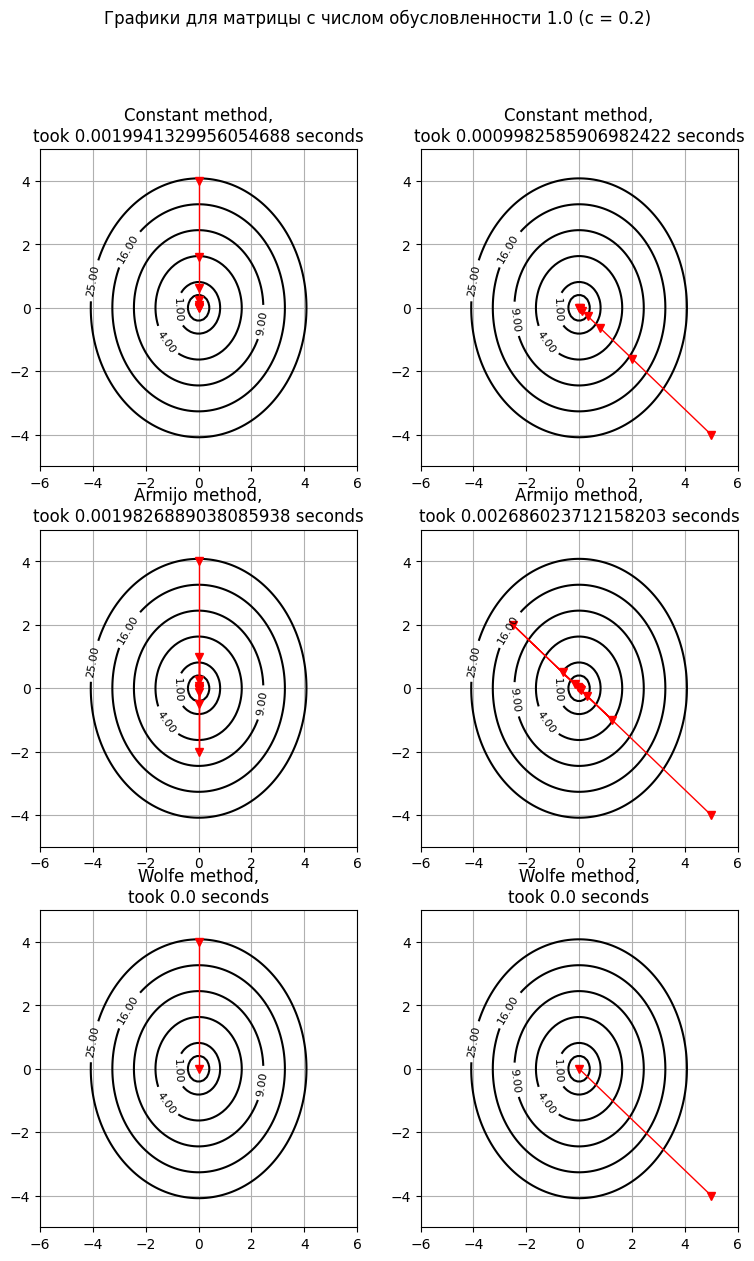

In [2]:
fig, ax = plt.subplots(3, 2, figsize=(9, 14))
methods = ['Constant', 'Armijo', 'Wolfe']
x_0_s = [[0, 4], [5, -4]]

A = np.array([[3, 0],
              [0, 3]])
b = np.zeros(2)
oracle = oracles.QuadraticOracle(A, b)

for i in range(3):
    for j in range(2):
        line_search = optimization.LineSearchTool(method = methods[i], c = 0.2)
        _, _, history = optimization.gradient_descent(
                                                    oracle, x_0_s[j], line_search_options = line_search, trace=True
                                                    )
        ax[i, j].set_title(methods[i]+f' method,\ntook {history["time"][-1]} seconds')
        oracle = oracles.QuadraticOracle(A, b)
        plot_levels(oracle.func, ax[i][j])
        plot_trajectory(oracle.func, ax[i][j], history['x'])

fig.suptitle(f'Графики для матрицы с числом обусловленности {np.linalg.cond(A)} (c = 0.2)');

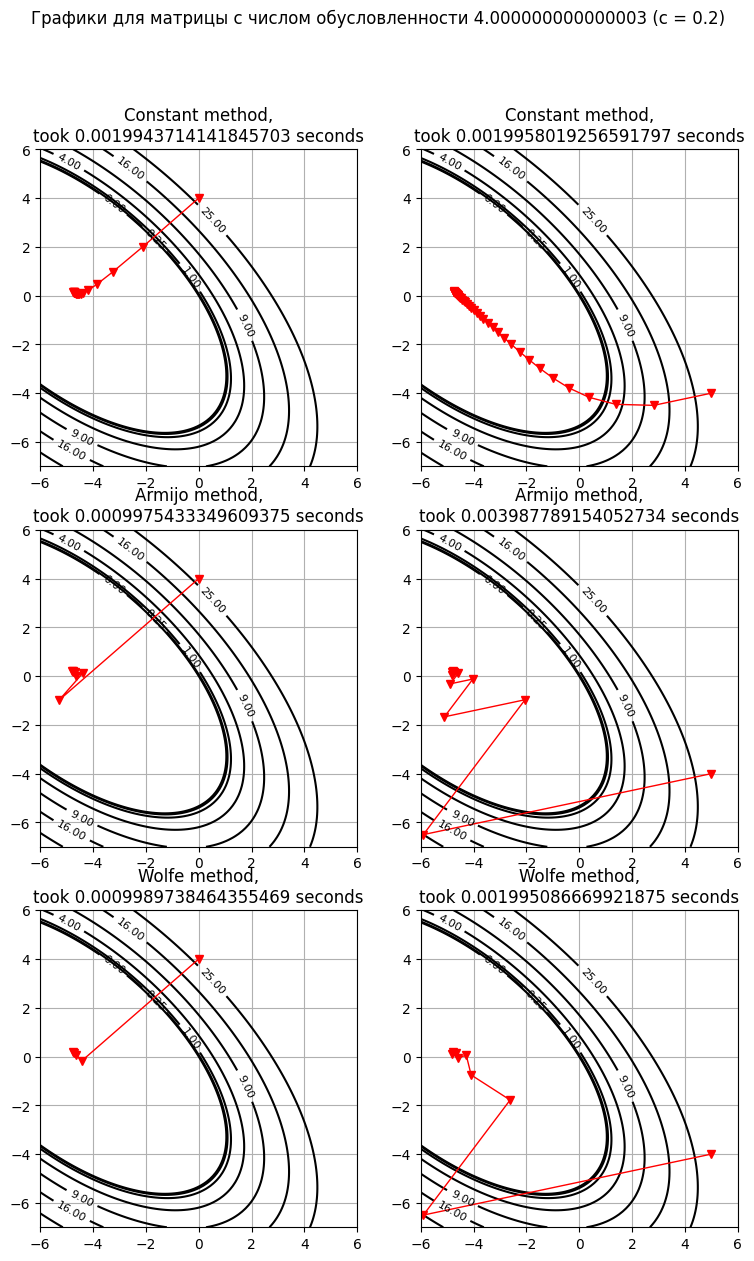

In [3]:
fig, ax = plt.subplots(3, 2, figsize=(9, 14))
methods = ['Constant', 'Armijo', 'Wolfe']
x_0_s = [[0, 4], [5, -4]]

A = np.array([[1.5, 0.9],
              [0.9, 1.5]])
b = np.array([-7, -4])
oracle = oracles.QuadraticOracle(A, b)

for i in range(3):
    for j in range(2):
        line_search = optimization.LineSearchTool(method = methods[i], c = 0.2)
        _, _, history = optimization.gradient_descent(
                                                    oracle, x_0_s[j], line_search_options = line_search, trace=True
                                                    )
        ax[i, j].set_title(methods[i]+f' method,\ntook {history["time"][-1]} seconds')
        oracle = oracles.QuadraticOracle(A, b)
        plot_levels(oracle.func, ax[i][j], yrange=[-7, 6])
        plot_trajectory(oracle.func, ax[i][j], history['x'])

fig.suptitle(f'Графики для матрицы с числом обусловленности {np.linalg.cond(A)} (c = 0.2)');

Легко заметить, что:
- чем хуже обусловлена матрица А, тем больше времени алгоритм тратит в целом
- из некоторых точек алгоритм "спускается" быстрее
- лучше всего со всеми задачами справляется метод Вульфа: он работает стабильнее, время не так сильно зависит от выбора начальной точки

## 3.2 Эксперимент: Зависимость числа итераций градиентного спуска от числа обусловленности и размерности пространства

Исследуйте, как зависит число итераций, необходимое градиентному спуску для сходимости, от следующих двух параметров: 1) числа обусловленности $κ ≥ 1$ оптимизируемой функции и 2) размерности
пространства $n$ оптимизируемых переменных.  

Для этого для заданных параметров n и κ сгенерируйте случайным образом квадратичную задачу размера n с числом обусловленности κ и запустите на ней градиентный спуск с некоторой фиксированной требуемой точностью. Замерьте число итераций $T(n,κ)$, которое потребовалось сделать методу до сходимости (успешному выходу по критерию остановки).  

**Рекомендация:** Проще всего сгенерировать случайную квадратичную задачу размера $n$ с заданным числом обусловленности $κ$ следующим образом. В качестве матрицы $A∈S^n_{++}$ удобно взять просто диагональную матрицу $A= Diag(a)$, у которой диагональные элементы сгенерированы случайно
в пределах $[1,κ]$, причем $min(a) = 1, max(a) = κ$. В качестве вектора $b∈R^n$ можно взять вектор со случайными элементами. Диагональные матрицы удобно рассматривать, поскольку с ними можно эффективно работать даже при больших значениях $n$. Рекомендуется хранить матрицу $A$ в формате разреженной диагональной матрицы (см. `scipy.sparse.diags`).  

Зафиксируйте некоторое значение размерности $n$. Переберите различные числа обусловленности
$κ$ по сетке и постройте график зависимости $T(κ,n)$ против $κ$. Поскольку каждый раз квадратичная задача генерируется случайным образом, то повторите этот эксперимент несколько раз. В результате для фиксированного значения $n$ у Вас должно получиться целое семейство кривых зависимости $T(κ,n)$ от $κ$. Нарисуйте все эти кривые одним и тем же цветом для наглядности (например, красным).  

Теперь увеличьте значение $n$ и повторите эксперимент снова. Вы должны получить новое семейство
кривых $T(n′,κ)$ против $κ$. Нарисуйте их все одним и тем же цветом, но отличным от предыдущего
(например, синим).  

Повторите эту процедуру несколько раз для других значений $n$. В итоге должно получиться несколько разных семейств кривых - часть красных (соответствующих одному значению $n$), часть синих (соответствующих другому значению $n$), часть зеленых и т. д.  

Обратите внимание, что значения размерности $n$ имеет смысл перебирать по логарифмической
сетке (например, $n = 10, n = 100, n = 1000$ и т. д.).  

Какие выводы можно сделать из полученной картинки?

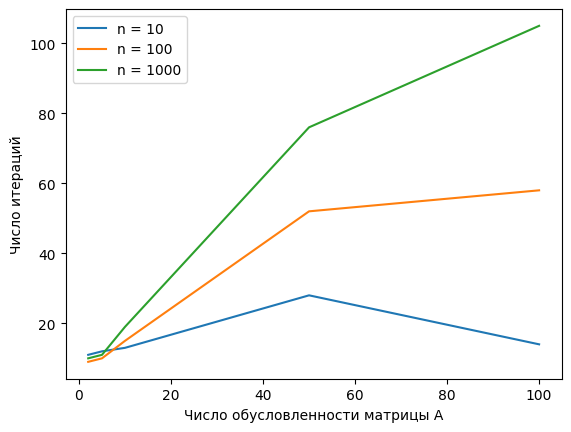

In [4]:
ks = [2, 5, 10, 50, 100]
ns = [10, 100, 1000]

for n in ns:
    values = []
    for k in ks:
        
        a = np.random.uniform(1, k, n)
        A = np.diag(a)
        b = np.random.randint(1, k, size=n)
        oracle = oracles.QuadraticOracle(A, b)
        _, _, history = optimization.gradient_descent(
            oracle, trace=True, x_0=np.random.uniform(1, 2, n)
        )
        values.append(len(history['func']))

    plt.plot(ks, values, label=f'n = {n}')
plt.legend();
plt.xlabel('Число обусловленности матрицы А');
plt.ylabel('Число итераций');

Если делать очевидные выводы:
- С ростом числа обусловленности число итераций возрастает
- С ростом размерности пространства число итераций тоже возрастает

## 3.3 Эксперимент: Сравнение методов градиентного спуска и Ньютона на реальной задаче логистической регрессии

Сравнить методы градиентного спуска и Ньютона на задаче обучения логистической регрессии на
реальных данных.

В качестве реальных данных используйте следующие три набора с сайта LIBSVM [http://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/.](http://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/.)
: *w8a*, *gisette* и *real-sim*. Коэффициент регуляризации взять стандартным образом: $λ = 1/m$.
Параметры обоих методов взять равными параметрам по умолчанию. Начальную точку выбрать
$x_0 = 0$.

Построить графики сходимости следующих двух видов:  
1) Зависимость значения функции от реального времени работы метода.  
2) Зависимость относительного квадрата нормы градиента $‖∇f(x_k)‖^2_2 /‖∇f(x_0)‖^2_2$ (в логарифмической шкале) против реального времени работы.

При этом оба метода (градиентный спуск и Ньютон) нужно рисовать на одном и том же графике.
Укажите в отчете, какова стоимость итерации и сколько памяти требуется каждому из методов в
зависимости от параметров $m$ (размер выборки) и $n$ (размерность пространства). При оценке используйте нотацию $O(·)$, скрывающую внутри себя абсолютные константы.

Какие выводы можно сделать по результатам этого эксперимента? Какой из методов лучше и в
каких ситуациях?

**Рекомендация:** Любой набор данных с сайта LIBSVM представляет из себя текстовый файл в фор-
мате svmlight. Чтобы считать такой текстовый файл, можно использовать функцию `load_svmlight_file` из модуля `sklearn.datasets`. Обратите внимание, что эта функция возвращает матрицу в формате `scipy.sparse.csr_matrix`, поэтому Ваша реализация логистического оракула должна поддерживать такие матрицы.

In [5]:
from sklearn.datasets import load_svmlight_file

In [6]:
def second_thing(hist):
    return np.linalg.norm(h)

def fastplot(ax, grad, newt):
    
    ax[i, 0].plot(grad['time'], grad['func'], label="Градиентный спуск")
    ax[i, 0].plot(newt['time'], newt['func'], label="Метод Ньютона")
    ax[i, 0].legend()
    ax[i, 0].set_ylabel("Значение функции")
    ax[i, 0].set_xlabel("Реальное время работы")
    ax[i, 0].set_title('Случай '+str(i))

    ax[i, 1].plot(grad['time'], np.array(grad['grad_norm']) ** 2 / grad['grad_norm'][0] ** 2, label="Градиентный спуск")
    ax[i, 1].plot(newt['time'], np.array(newt['grad_norm']) ** 2 / newt['grad_norm'][0] ** 2, label="Метод Ньютона")
    ax[i, 1].legend()
    ax[i, 1].set_ylabel("$‖∇f(x_k)‖^2_2 /‖∇f(x_0)‖^2_2$")
    ax[i, 1].set_xlabel("Реальное время работы")
    ax[i, 1].set_yscale("log")
    ax[i, 1].set_title('Случай '+str(i))

    print('Случай', i)
    print(f"Итераций градиентного спуска = {len(grad['func'])}")
    print(f"Итераций метода Ньютона = {len(newt['func'])}")

Случай 0
Итераций градиентного спуска = 36
Итераций метода Ньютона = 7


C:\Python310\lib\site-packages\scipy\optimize\_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


Случай 2
Итераций градиентного спуска = 104
Итераций метода Ньютона = 6


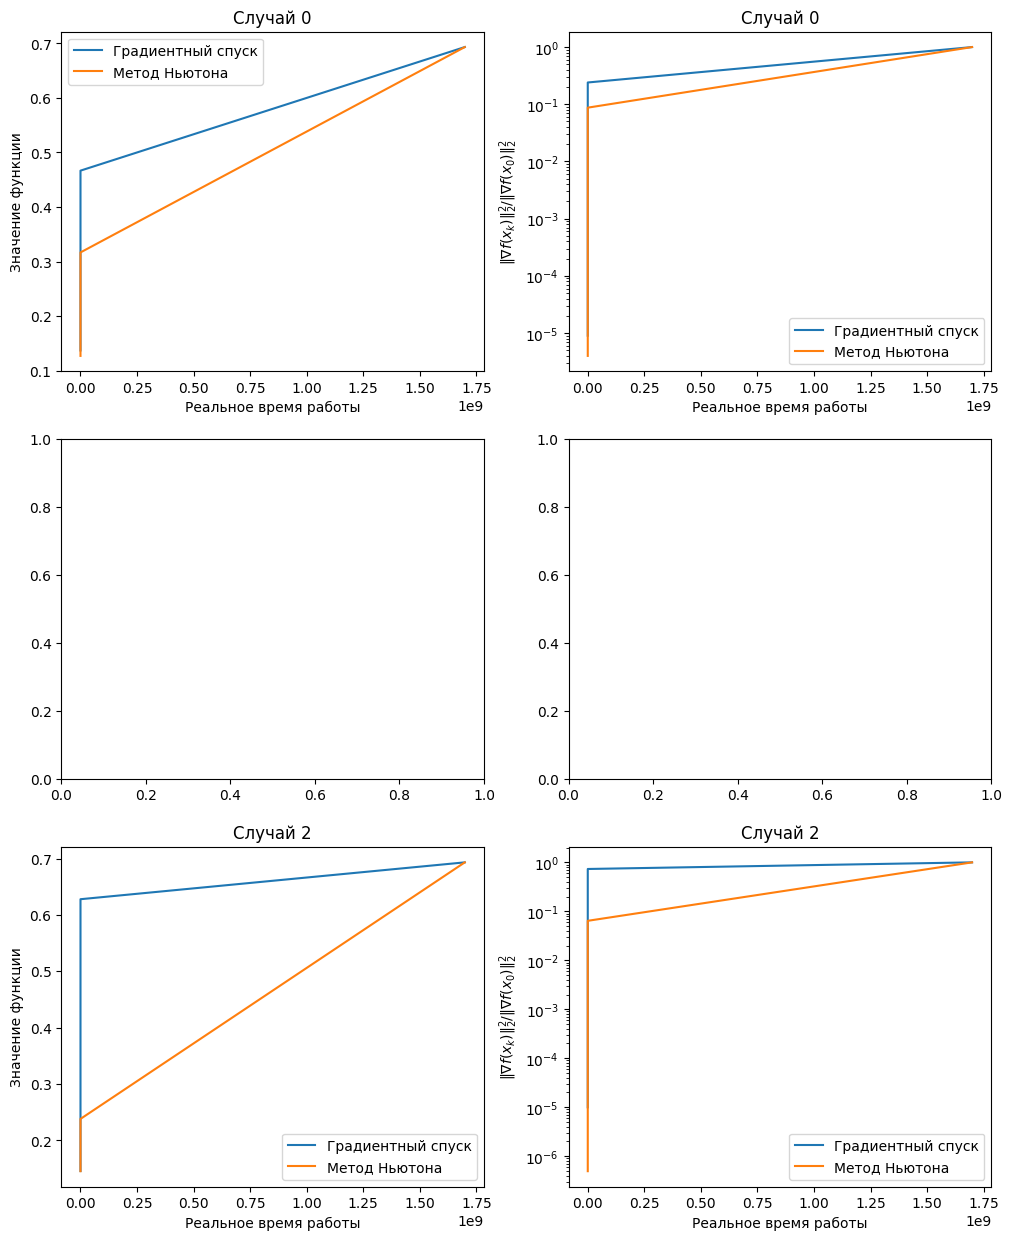

In [7]:
filenames = ['data/w8a.txt', 'data/gisette_scale.bz2', 'data/real-sim.bz2']
fig, ax = plt.subplots(3, 2, figsize=(12, 15))
for i in range(len(filenames)):
    A, b = load_svmlight_file(filenames[i])
    M = A.shape[0]
    n = A.shape[1]
    C = 1 / M

    oracle = oracles.create_log_reg_oracle(A, b, C)
    if i != 1:
        _, _, grad_history = optimization.gradient_descent(oracle=oracle, x_0=np.zeros(n), trace=True)
        _, _, newt_history = optimization.newton(oracle=oracle, x_0=np.zeros(n), trace=True)
        fastplot(ax, grad_history, newt_history)

Второй случай ("Случай 1") требует больше полутора часов работы на моём ноуте, а я случайно удалил аутпут с количеством итераций и графиками (кажется, там было 1300+ итераций для градиентного спуска и 7 для Ньютона. Так что подсчёт градиентного спуска для второй выборки пропустим и построим два графика для Ньютона)

<!-- ## 3.4 (Бонусная часть) Эксперимент: Оптимизация вычислений в градиентном спуске

Сравнить градиентный спуск на логистической регрессии для обычного оракула и оптимизирован-
ного.
В качестве выборки использовать модельную с размерамиm= 10000,n= 8000. Пример генерации
модельной выборки из стандартного нормального распределения:

np.random.seed(31415)
m, n = 10000, 8000
A = np.random.randn(m, n)
b = np.sign(np.random.randn(m))

Коэффициент регуляризации выбрать стандартнымλ= 1/m.
Параметры метода взять равными параметрам по умолчанию. Начальную точку выбратьx 0 = 0.
Нарисовать графики:

```
(a) Зависимость значения функции от номера итерации.
```
```
(b) Зависимость значения функции от реального времени работы метода.
```
```
(c) Зависимость относительного квадрата нормы градиента‖∇f(xk)‖^22 /‖∇f(x 0 )‖^22 (в логарифмиче-
ской шкале) против реального времени работы.
```
При этом оба метода (с обычным оракулом и с оптимизированным) нужно рисовать на одном и том
же графике.
Объясните, почему траектории обоих методов на первом графике совпадают.


 -->

<!-- 
## 3.5 (Бонусная часть) Эксперимент: Стратегия выбора длины шага в градиентном спуске

Исследовать, как зависит поведение метода от стратегии подбора шага: константный шаг (попро-
бовать различные значения), бэктрэкинг (попробовать различные константыc), условия Вульфа (по-
пробовать различные параметрыc 2 ).
Рассмотрите квадратичную функцию и логистическую регрессию с модельными данным (сгенери-
рованными случайно).
Запустите для этих функций градиентный спуск с разными стратегиями выбора шагаиз одной и
той же начальной точки.
Нарисуйте кривые сходимости (относительная невязка по функции в логарифмической шкале про-
тив числа итераций – для квадратичной функции, относительный квадрат нормы градиента в лога-
рифмической шкале против числа итераций – для логистической регрессии) для разных стратегий на
одномграфике.
Попробуйте разные начальные точки. Ответьте на вопрос:Какая стратегия выбора шага является
самой лучшей?

 -->